# CEE 498: Transportation Economics
## Assignment One
### Noah Garfinkle (garfink2@illinois edu)
### 05 February 2020

## 0. References and Works Cited

|Link|Notes|
|---|---|
|https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html|Scipy Lognormal Distribution|
|https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.logistic.html|Scipy Logistic Distribution|

# Imports and Config

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import logistic, lognorm
from scipy import integrate
import pandas as pd

# Problem 3

In [46]:
c = 1.0
α1 = 10.0
α2 = 5.0
β1 = 2.0
β2 = 1.25

In [128]:
def q(p,α,β):
    demand = α-β*p
    demand = np.max([demand,0])
    return demand

Plot demands for a range of P

In [129]:
Ps = np.linspace(0,10,100)

In [130]:
q1 = [q(P,α1,β1) for P in Ps]

In [131]:
q2 = [q(P,α2,β2) for P in Ps]

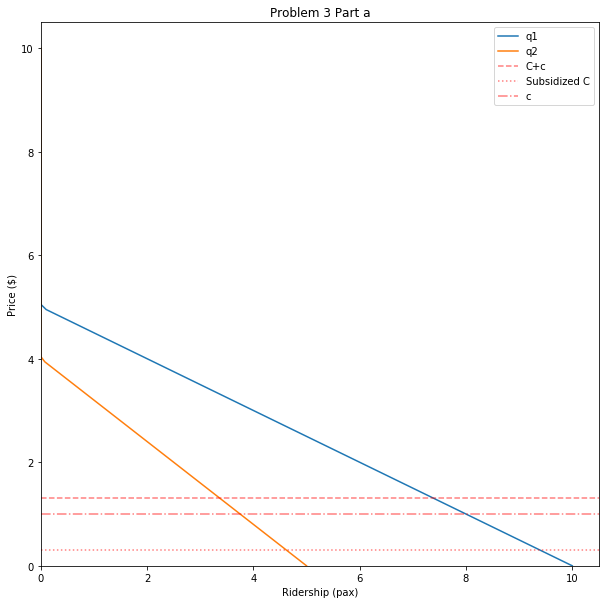

In [152]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(q1,Ps,label="q1")
ax.plot(q2,Ps,label="q2")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 3 Part a")

ax.axhline(1.3,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(0.3,label="Subsidized C",ls=":",alpha=0.5,color="red")
ax.axhline(1.0,label="c",ls="-.",alpha=0.5,color="red")

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


Problem 3a.

In [133]:
C=0.3

In [134]:
q(c+C,α1,β1)

7.4

In [135]:
q(c,α2,β2)

3.75

Problem 3b.

In [136]:
C=3.0

In [137]:
q(c+C,α1,β1)

2.0

In [138]:
q(c+C,α2,β2)

0.0

In [141]:
qt = [q(P,α1+α2,(β1+β2)/2) for P in Ps]

In [61]:
qt = []
for P in Ps:
    qt.append(q(P,α1,β1) + q(P,α2,β2))

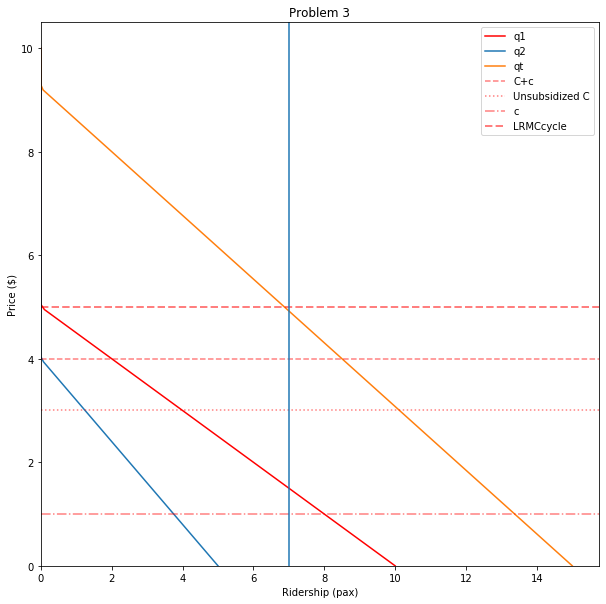

In [142]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(q1,Ps,label="q1",color='red')
ax.plot(q2,Ps,label="q2")
ax.plot(qt,Ps,label="qt")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 3 Part b")

ax.axhline(4.0,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(3.0,label="Unsubsidized C",ls=":",alpha=0.5,color="red")
ax.axhline(1.0,label="c",ls="-.",alpha=0.5,color="red")
ax.axhline(5,label="LRMCcycle",ls="--",alpha=0.5,color='red',lw=2)

ax.axvline(7)

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


# below this be dragons

In [90]:
qt = [q1[i] + q2[i] for i in range(0,len(q1))]

In [139]:
qt = np.array(q1) + np.array(q2)

In [18]:
10/3.25

3.076923076923077

In [66]:
arr_p = []
arr_q1 = []
arr_q2 = []
arr_qt = []
for P in Ps:
    val_q1 = q(P,α1,β1)
    val_q2 = q(P,α2,β2)
    val_qt = val_q1 + val_q2
    arr_p.append(P)
    arr_q1.append(val_q1)
    arr_q2.append(val_q2)
    arr_qt.append(val_qt)
df = pd.DataFrame({"p":arr_p,"q1":arr_q1,"q2":arr_q2,"qt":arr_qt})

In [73]:
df[df["qt"].between(-0.5,0.5)]

,p,q1,q2,qt
45,4.545455,0.909091,-0.681818,0.227273
46,4.646465,0.707071,-0.808081,-0.101010
47,4.747475,0.505051,-0.934343,-0.429293


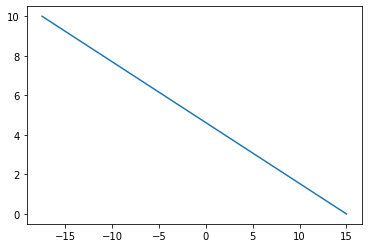

In [68]:
plt.plot(df["qt"],df["p"])

# 3 Try Again

In [115]:
def p(q,α,β):
    price = (α-q)/β
    if price < 0.0:
        price = 0.0
    return price

In [116]:
qs = np.linspace(0,20,100)

In [117]:
p1 = [p(q,α1,β1) for q in qs]

In [118]:
p2 = [p(q,α2,β2) for q in qs]

In [119]:
pt = [p(q,α1,β1) + p(q,α2,β2) for q in qs]

In [120]:
q=7.5
p(q,α1,β1) + p(q,α2,β2)

1.25

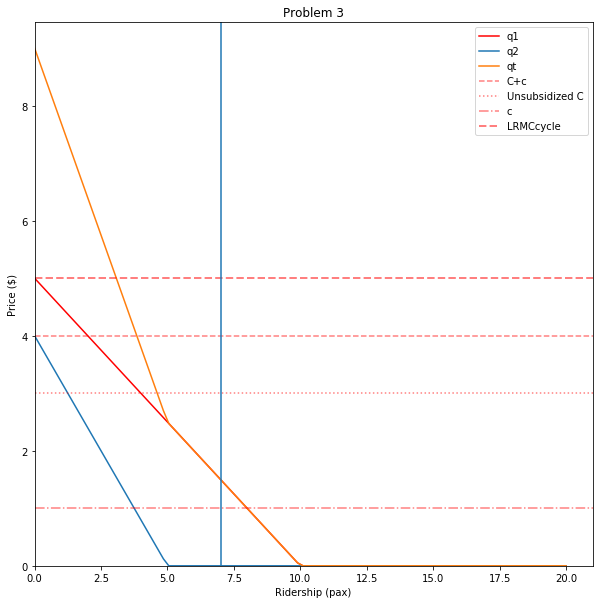

In [121]:
fig,ax = plt.subplots(figsize=(10,10))
# y axis is price
# x axis is demand
ax.plot(qs,p1,label="q1",color='red')
ax.plot(qs,p2,label="q2")
ax.plot(qs,pt,label="qt")
ax.set_ylabel("Price ($)")
ax.set_xlabel("Ridership (pax)")
ax.set_title("Problem 3")

ax.axhline(4.0,label="C+c",ls="--",alpha=0.5,color="red")
ax.axhline(3.0,label="Unsubsidized C",ls=":",alpha=0.5,color="red")
ax.axhline(1.0,label="c",ls="-.",alpha=0.5,color="red")
ax.axhline(5,label="LRMCcycle",ls="--",alpha=0.5,color='red',lw=2)

ax.axvline(7)

ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.legend()


In [112]:
q(0,α1,β1)

10.0

In [114]:
q(4,α2,β2)

0.0

# 3 try again again

# Problem 4

In [19]:
λ = 500 # pax
# L is the trip length in km
# V is the gross benefit in $

In [20]:
# distribution of trip length is lognormally distributed
# with scale parameter of 0.5 and shape parameter of 1

In [21]:
L = lognorm(s=1.0,scale=0.5)

Text(0, 0.5, 'P(L<l)')

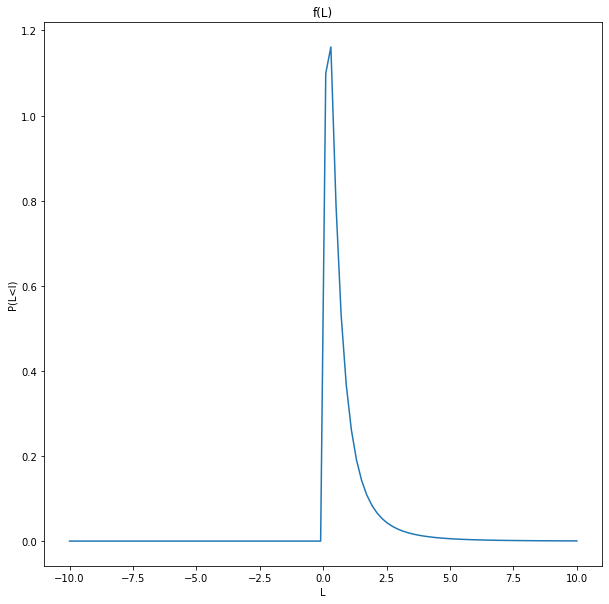

In [22]:
x = np.linspace(-10,10, 100)
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(x, L.pdf(x))
ax.set_title("f(L)")
ax.set_xlabel("L")
ax.set_ylabel("P(L<l)")

In [23]:
# Gross benefit is dsitributed with logistic distribution with
# location parameter 1.5

In [24]:
V = logistic(loc=1.5)

Text(0, 0.5, 'P(V<v)')

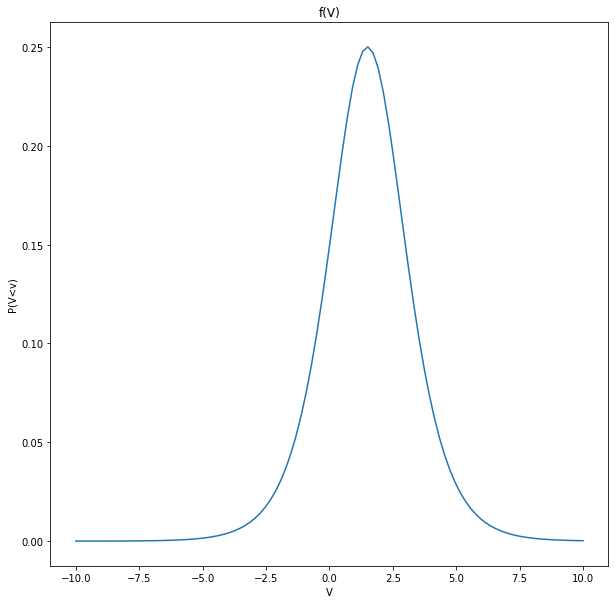

In [25]:
x = np.linspace(-10,10, 100)
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(x, V.pdf(x))
ax.set_title("f(V)")
ax.set_xlabel("V")
ax.set_ylabel("P(V<v)")

In [143]:
ps = np.linspace(0.1,1,20)

In [149]:
f = lambda v,l: V.pdf(v)*L.pdf(l)

In [150]:
results = []
for p in ps:
    result = integrate.dblquad(f,0,np.inf,lambda l:p*l, lambda l:np.inf)[0] * λ
    results.append(result)

Text(0.5, 0, 'Demand (pax)')

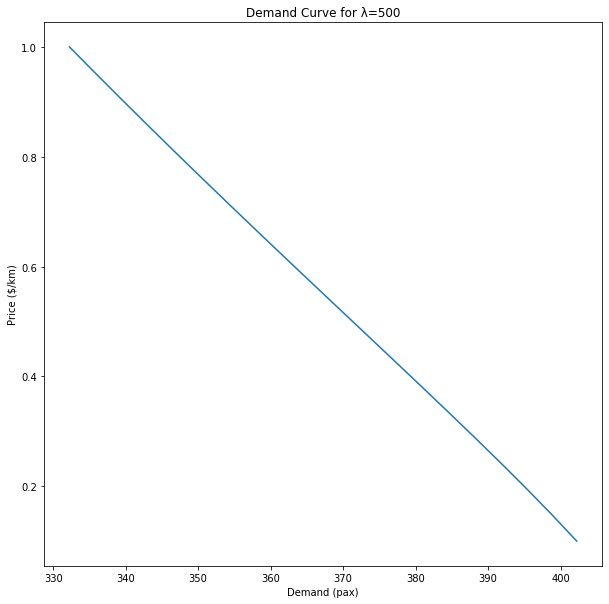

In [151]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(results,ps,label="demand curve")
ax.set_title("Demand Curve for λ=500")
ax.set_ylabel("Price ($/km)")
ax.set_xlabel("Demand (pax)")